In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("student career prediction.csv")

In [4]:
df.head()

,do you like coding/ a good coder?,Are you intrested in ML?,Are you interested in research?,intrested in using ML models to solve DS problems?,intrested in build and manage data infrastructure?,do you enjoy consulting and advising AI solutions?,intrested in business insights and decision making?,suggested career
0,yes,yes,no,yes,yes,yes,no,Applied ml scientist
1,yes,yes,no,no,yes,yes,no,ML Engineer
2,no,yes,no,yes,yes,yes,yes,AI consultant
3,yes,yes,yes,yes,yes,yes,yes,AI/ML researcher
4,yes,yes,yes,no,no,no,yes,AI/ML researcher


In [50]:
df.columns

Index(['do you like coding/ a good coder?', 'Are you intrested in ML?',
       'Are you interested in research?',
       'intrested in using ML models to solve DS problems?',
       'intrested in build and manage data infrastructure?',
       'do you enjoy consulting and advising AI solutions?',
       'intrested in business insights and decision making?',
       'suggested career'],
      dtype='object')

In [82]:
df=df.rename(columns={
    'do you like coding/ a good coder?':'good_coder',
    'Are you intrested in ML?':'intrest_in_ml',
    'Are you interested in research?':'intrest_in_research',
    'intrested in using ML models to solve DS problems?':'intrest_in_ml_model_for_ds',
    'intrested in build and manage data infrastructure?':'intrest_to_build_data_infrastructure',
    'do you enjoy consulting and advising AI solutions?':'enjoy_consulting',
    'intrested in business insights and decision making?':'intrest_in_business_insights'
})

In [83]:
x=df.iloc[:,:-1]
x.head()

,good_coder,intrest_in_ml,intrest_in_research,intrest_in_ml_model_for_ds,intrest_to_build_data_infrastructure,enjoy_consulting,intrest_in_business_insights
0,yes,yes,no,yes,yes,yes,no
1,yes,yes,no,no,yes,yes,no
2,no,yes,no,yes,yes,yes,yes
3,yes,yes,yes,yes,yes,yes,yes
4,yes,yes,yes,no,no,no,yes


In [84]:
y=df['suggested career']
y.head()

0    Applied ml scientist
1             ML Engineer
2           AI consultant
3        AI/ML researcher
4        AI/ML researcher
Name: suggested career, dtype: object

In [85]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x=encoder.fit_transform(x) 

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [87]:
x_train

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

# Applying decision tree classifier for our dataset

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
treemodel = DecisionTreeClassifier(max_depth=3)

In [90]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.741\nsamples = 573\nvalue = [79, 19, 258, 71, 5, 28, 72, 17, 24]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.568\nsamples = 131\nvalue = [79, 19, 0, 0, 5, 28, 0, 0, 0]'),
 Text(0.125, 0.375, 'x[19] <= 0.5\ngini = 0.257\nsamples = 33\nvalue = [0, 0, 0, 0, 5, 28, 0, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 0, 28, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[15] <= 0.5\ngini = 0.313\nsamples = 98\nvalue = [79, 19, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 79\nvalue = [79, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[4] <= 0.5\ngini = 0.603\nsamples = 442\nvalue = [0, 0, 258, 71, 0, 0, 72, 17, 24]'),
 Text(0.625, 0.375, 'x[12] <= 0.5\ngini = 0.375\nsamples = 96\nvalue = [0, 0, 0, 0, 0, 0, 72, 0, 24]'),
 Text(0.5625, 0.125

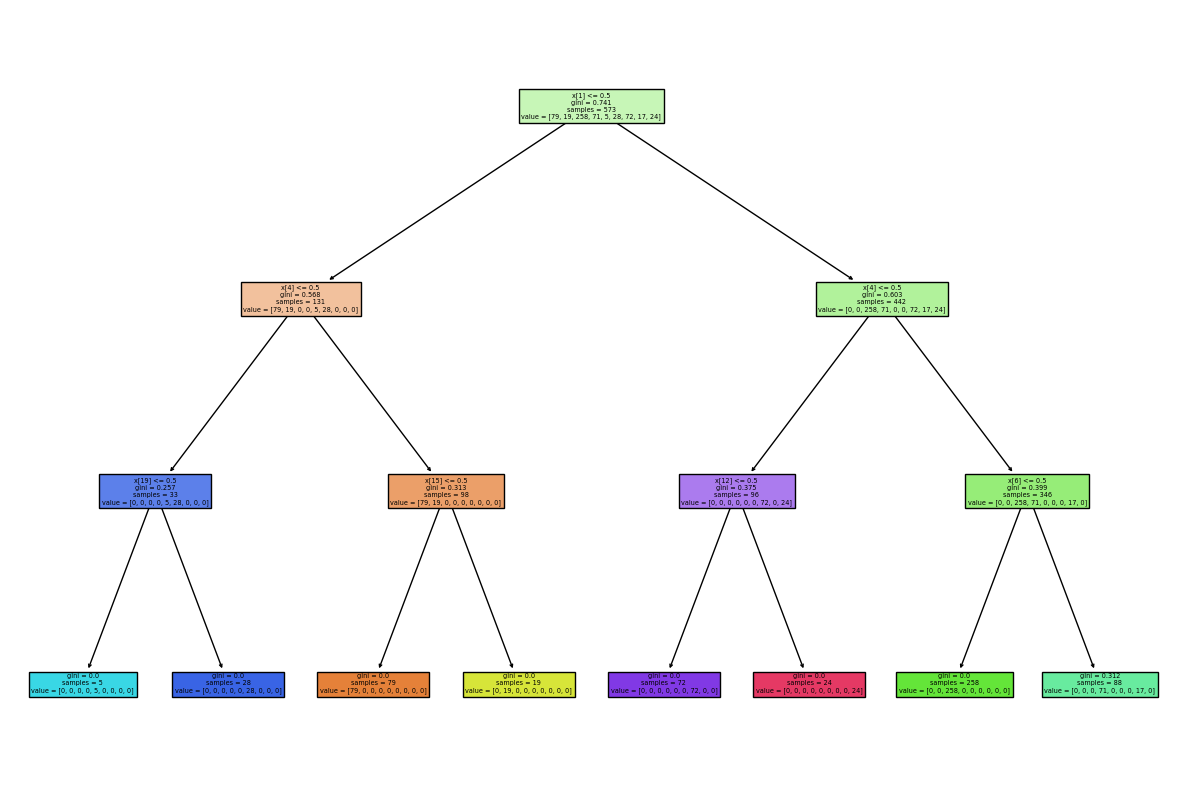

In [96]:

from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(treemodel,filled=True)

In [61]:
x_test.shape

(283, 21)

In [62]:
x_test

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [109]:
z = np.array([['no','yes','no','no','yes','no','yes']])
z

array([['no', 'yes', 'no', 'no', 'yes', 'no', 'yes']], dtype='<U3')

In [98]:
z.shape

(1, 7)

In [99]:
z=encoder.transform(z)
z=z.astype(float)
z

array([[1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0.]])

In [100]:
z.shape

(1, 21)

In [101]:
y_pred = treemodel.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
dt_score = accuracy_score(y_pred,y_test)
dt_score

0.9752650176678446

In [104]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred,y_test))

                               precision    recall  f1-score   support

                AI consultant       1.00      0.95      0.97        41
           AI product manager       0.88      1.00      0.93        14
             AI/ML researcher       1.00      0.99      1.00       126
         Applied ml scientist       0.96      0.87      0.92        31
Business intelligence analyst       1.00      1.00      1.00         3
                 Data analyst       1.00      1.00      1.00        11
                Data engineer       1.00      1.00      1.00        44
                  ML Engineer       0.00      0.00      0.00         0
            Software engineer       1.00      1.00      1.00        13

                     accuracy                           0.98       283
                    macro avg       0.87      0.87      0.87       283
                 weighted avg       0.99      0.98      0.98       283



In [71]:
import pickle

In [113]:
import joblib as jb
jb.dump(encoder,'new_encoder.pkl')

['new_encoder.pkl']

In [114]:
import joblib as jb
jb.dump(treemodel,'new_tree.pkl')

['new_tree.pkl']

In [107]:
import joblib
preprocessor=joblib.load('encoder.pkl')

In [108]:
classifier=joblib.load('tree.pkl')

In [110]:
YY_pred = preprocessor.transform(z)

In [ ]:
YY_pred

In [111]:
final=classifier.predict(YY_pred)

In [112]:
final

array(['AI product manager'], dtype=object)

# Applying random forest classifier model for dataset

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf_model = RandomForestClassifier(n_estimators = 50, random_state=43)

In [121]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=43)

In [122]:
y2_pred = rf_model.predict(x_test)

In [123]:
rf_score = accuracy_score(y2_pred,y_test)
rf_score

0.9929328621908127

In [124]:
print(classification_report(y2_pred,y_test))

                               precision    recall  f1-score   support

                AI consultant       1.00      1.00      1.00        39
           AI product manager       1.00      1.00      1.00        16
             AI/ML researcher       1.00      0.99      1.00       126
         Applied ml scientist       0.96      0.96      0.96        28
Business intelligence analyst       1.00      1.00      1.00         3
                 Data analyst       1.00      1.00      1.00        11
                Data engineer       0.98      1.00      0.99        43
                  ML Engineer       1.00      1.00      1.00         4
            Software engineer       1.00      1.00      1.00        13

                     accuracy                           0.99       283
                    macro avg       0.99      1.00      0.99       283
                 weighted avg       0.99      0.99      0.99       283



# Applying adaboost model for dataset

In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
adaboost_classifier = AdaBoostClassifier()

In [127]:
adaboost_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [128]:
y3_pred = adaboost_classifier.predict(x_test)

In [129]:
ab_score = accuracy_score(y3_pred,y_test)
ab_score

0.773851590106007

In [130]:
print(classification_report(y3_pred,y_test))

                               precision    recall  f1-score   support

                AI consultant       1.00      0.71      0.83        55
           AI product manager       0.00      0.00      0.00         0
             AI/ML researcher       1.00      0.80      0.89       157
         Applied ml scientist       0.00      0.00      0.00         0
Business intelligence analyst       0.00      0.00      0.00         0
                 Data analyst       1.00      0.79      0.88        14
                Data engineer       1.00      0.77      0.87        57
                  ML Engineer       0.00      0.00      0.00         0
            Software engineer       0.00      0.00      0.00         0

                     accuracy                           0.77       283
                    macro avg       0.44      0.34      0.39       283
                 weighted avg       1.00      0.77      0.87       283



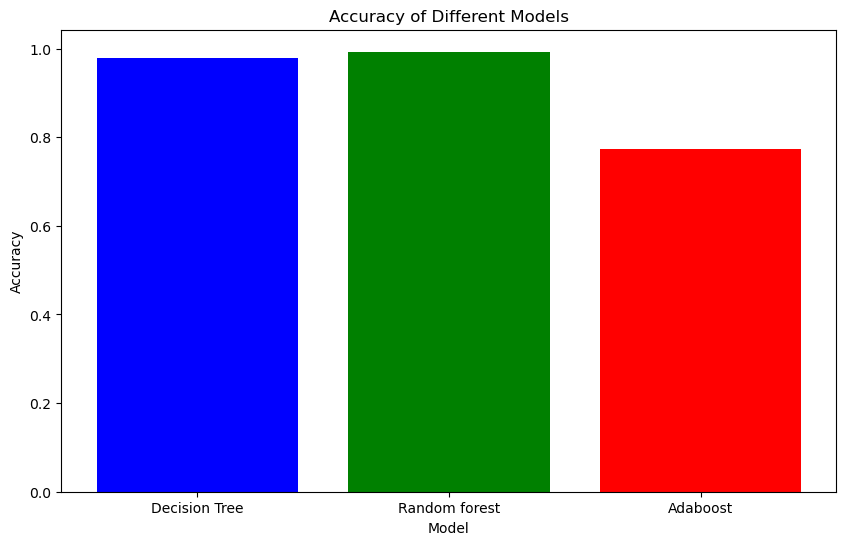

In [131]:
import matplotlib.pyplot as plt


models = ['Decision Tree', 'Random forest', 'Adaboost']

# List of accuracies for each model (replace these values with actual accuracies)
accuracies = [dt_score, rf_score, ab_score]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the bar graph
plt.show()


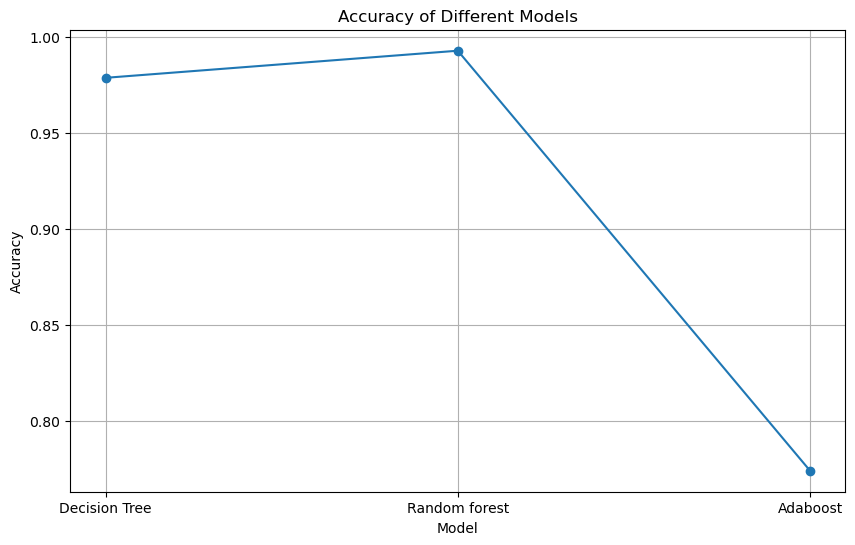

In [132]:
import matplotlib.pyplot as plt

# List of model names
models = ['Decision Tree', 'Random forest', 'Adaboost']

accuracies = [dt_score, rf_score, ab_score]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')

plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()
